# 디지털 성범죄 의안 텍스트 분석

- 코코넛: 박하람, 이육샛별 
- 코드 작성자: 이육샛별 사회학과 20202343

### 1. EDA
의안결과, 의안통과시간, 소관위원회별 발의 건수
### 2. Wordcloud 분석을 통해 N번방 전후 의안 변화 분석
### 3. Topic Modeling을 통해 의안의 숨겨진 주제 찾기

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from nltk import RegexpTokenizer
import seaborn as sns
import datetime
import time
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import platform

In [51]:
import matplotlib.pyplot as plt
plt.rc('font', family='콤퓨타세탁B.ttf')
print(plt.rcParams['font.family'])
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 6)

['콤퓨타세탁B.ttf']


In [3]:
bill = pd.read_csv('digital-sexual-crime-relevant-bill.csv', index_col=0,
                    parse_dates=['제안일자','의결일자'], encoding='utf-8-sig')
bill.head()

,의안번호,의안명,제안일자,제안자구분,의결일자,의결결과,제안회기,제안이유,소관위원회,제안자
0,140026,성폭력행위의처벌과피해자보호등에관한법률안,1992-07-22,의원,1993-12-17,대안반영폐기,제14대 (1992~1996) 제157회,"1. 우리 사회의 개방화, 도시화 추세, 그리고 민생치안의 파탄 등으로 여성과 미성...",법제사법위원회,"['박상천', '강창성', '강철선', '강희찬', '국종남', '권노갑', '김대..."
1,152220,아동·청소년의성보호에관한법률안,1999-11-02,의원,1999-11-04,철회,제15대 (1996~2000) 제208회,그 동안 우리사회 일각에서 꾸준히 제기되어 왔던 아동·청소년의 성을 상품화하는 문제...,정무위원회,"['박상천', '박상천', '임채정', '정세균', '김근태', '김길환', '김명..."
2,151088,성폭력범죄의처벌및피해자보호등에관한법률중개정법률안,1998-07-03,의원,1998-12-02,수정가결,제15대 (1996~2000) 제194회,"자기 또는 사람의 성적 욕망을 유발하거나 만족시킬 목적으로 주거·관리하는 건조물, ...",법제사법위원회,"['권영자', '강삼재', '강현욱', '권오을', '김길환', '김영선', '김재..."
3,161432,정보통신망이용촉진및정보보호등에관한법률중개정법률안,2002-02-05,의원,2002-11-08,대안반영폐기,제16대 (2000~2004) 제227회,"청소년유해매체물인 음란 폭력물이 각종의 전송매체(전자우편, 휴대전화 등)를 ...",과학기술정보통신위원회,"['김영춘', '강재섭', '권오을', '김경천', '김기춘', '김락기', '김무..."
4,176449,형법 일부개정법률안,2007-04-18,의원,2008-05-29,임기만료폐기,제17대 (2004~2008) 제267회,"■ 성적자기결정권을 침해하는 범죄는 기본법인 「형법」에서 규정하여야 하나, 「...",법제사법위원회,"['임종인', '강혜숙', '김애실', '김태년', '김희선', '신명', '신상진..."


## 1. EDA

### 의안 결과

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 6)

['NanumGothic']


In [5]:
#의결결과 시각화
bill['의결결과'].unique()

array(['대안반영폐기', '철회', '수정가결', '임기만료폐기', '원안가결', '폐기', nan], dtype=object)

In [6]:
bill['의결결과'].value_counts()

임기만료폐기    88
대안반영폐기    74
원안가결      15
철회         3
폐기         1
수정가결       1
Name: 의결결과, dtype: int64

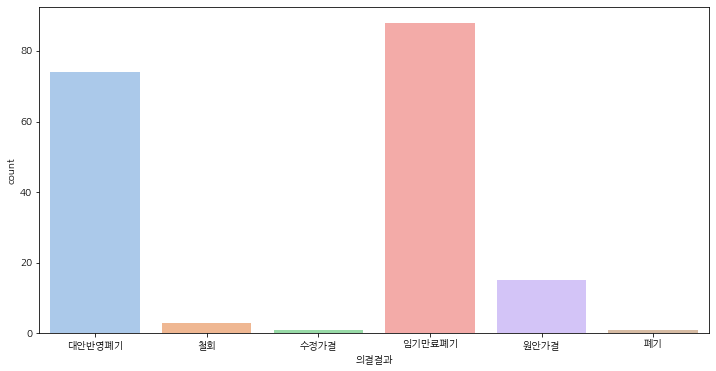

In [7]:
sns.set_palette("pastel")
sns.countplot(data=bill, x='의결결과')

* 임기만료폐기 > 대안반영폐기 > 원안가결 > 철회 > 수정가결 > 폐기

In [8]:
bill['의결결과'].value_counts(normalize=True)                                        

임기만료폐기    0.483516
대안반영폐기    0.406593
원안가결      0.082418
철회        0.016484
폐기        0.005495
수정가결      0.005495
Name: 의결결과, dtype: float64

### 의안 통과까지 걸리는 시간 평균 

In [9]:
pass1 = bill['의결결과'] == '원안가결'
bill_pass1 = bill[pass1]
bill_pass1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 1
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   의안번호    15 non-null     int64         
 1   의안명     15 non-null     object        
 2   제안일자    15 non-null     datetime64[ns]
 3   제안자구분   15 non-null     object        
 4   의결일자    15 non-null     datetime64[ns]
 5   의결결과    15 non-null     object        
 6   제안회기    15 non-null     object        
 7   제안이유    15 non-null     object        
 8   소관위원회   15 non-null     object        
 9   제안자     6 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 1.3+ KB


In [ ]:
pass2 = bill['의결결과'] == '수정가결'
bill_pass2 = bill[pass1]
bill_pass2.info()

In [11]:
bill_pass = pd.concat([bill_pass1,bill_pass2])
bill_pass.head()

,의안번호,의안명,제안일자,제안자구분,의결일자,의결결과,제안회기,제안이유,소관위원회,제안자
6,175076,성폭력범죄의처벌및피해자보호등에관한법률 일부개정법률안,2006-09-28,위원장,2006-09-29,원안가결,제17대 (2004~2008) 제262회,가. 2004년 12월 22일 공성진의원 등 36인이 발의한 性暴力犯罪의處罰및...,법제사법위원회,[]
9,1814361,범죄수익은닉의 규제 및 처벌 등에 관한 법률 일부개정법률안,2011-12-29,위원장,2011-12-29,원안가결,제18대 (2008~2012) 제304회,■ 대안의 제안경위건 명의안번호발의자회부일상정일범죄수익의 규제 및 처벌 등에 관...,법제사법위원회,[]
28,1808031,아동·청소년의 성보호에 관한 법률 일부개정법률안,2010-03-31,위원장,2010-03-31,원안가결,제18대 (2008~2012) 제288회,건명 의안번호 발의자 회부일 상정일청소년의 성보호에 관한 법률 일부개정법률안제...,보건복지위원회,[]
52,2024979,아동·청소년의 성보호에 관한 법률 일부개정법률안,2020-05-20,위원장,2020-05-20,원안가결,제20대 (2016~2020) 제378회,2. 대안의 아동？청소년 음란물 범죄의 규모와 형태가 갈수록 교묘해지고 있지만...,여성가족위원회,NaN
53,2024963,정보통신망 이용촉진 및 정보보호 등에 관한 법률 일부개정법률안,2020-05-20,위원장,2020-05-20,원안가결,제20대 (2016~2020) 제378회,대안의 가. 현행법상 금지되는 정보통신망 침해행위에 최근 정보통신망의 정상적인...,과학기술정보방송통신위원회,NaN


In [12]:
bill_pass['제안일자'] = pd.to_datetime(bill_pass['제안일자'])
bill_pass['의결일자'] = pd.to_datetime(bill_pass['의결일자'])

In [13]:
bill_pass['기간'] = bill_pass['의결일자'] - bill_pass['제안일자']
bill_pass.head()

,의안번호,의안명,제안일자,제안자구분,의결일자,의결결과,제안회기,제안이유,소관위원회,제안자,기간
6,175076,성폭력범죄의처벌및피해자보호등에관한법률 일부개정법률안,2006-09-28,위원장,2006-09-29,원안가결,제17대 (2004~2008) 제262회,가. 2004년 12월 22일 공성진의원 등 36인이 발의한 性暴力犯罪의處罰및...,법제사법위원회,[],1 days
9,1814361,범죄수익은닉의 규제 및 처벌 등에 관한 법률 일부개정법률안,2011-12-29,위원장,2011-12-29,원안가결,제18대 (2008~2012) 제304회,■ 대안의 제안경위건 명의안번호발의자회부일상정일범죄수익의 규제 및 처벌 등에 관...,법제사법위원회,[],0 days
28,1808031,아동·청소년의 성보호에 관한 법률 일부개정법률안,2010-03-31,위원장,2010-03-31,원안가결,제18대 (2008~2012) 제288회,건명 의안번호 발의자 회부일 상정일청소년의 성보호에 관한 법률 일부개정법률안제...,보건복지위원회,[],0 days
52,2024979,아동·청소년의 성보호에 관한 법률 일부개정법률안,2020-05-20,위원장,2020-05-20,원안가결,제20대 (2016~2020) 제378회,2. 대안의 아동？청소년 음란물 범죄의 규모와 형태가 갈수록 교묘해지고 있지만...,여성가족위원회,NaN,0 days
53,2024963,정보통신망 이용촉진 및 정보보호 등에 관한 법률 일부개정법률안,2020-05-20,위원장,2020-05-20,원안가결,제20대 (2016~2020) 제378회,대안의 가. 현행법상 금지되는 정보통신망 침해행위에 최근 정보통신망의 정상적인...,과학기술정보방송통신위원회,NaN,0 days


In [14]:
bill_pass['기간'].mean()

Timedelta('12 days 15:00:00')

불법촬영물 의안 통과시 평균 12일이 걸린다

### 소관위원회별 의안 발의 건수 

In [15]:
#소관위원회
bill['소관위원회'].value_counts()

법제사법위원회                 93
여성가족위원회                 41
과학기술정보방송통신위원회           23
행정안전위원회                 21
문화체육관광방송통신위원회            7
아동·여성대상 성폭력 대책 특별위원회     6
교육위원회                    5
보건복지위원회                  4
정무위원회                    3
문화체육관광위원회                3
안전행정위원회                  2
미래창조과학방송통신위원회            2
농림축산식품해양수산위원회            1
보건복지가족위원회                1
과학기술정보통신위원회              1
Name: 소관위원회, dtype: int64

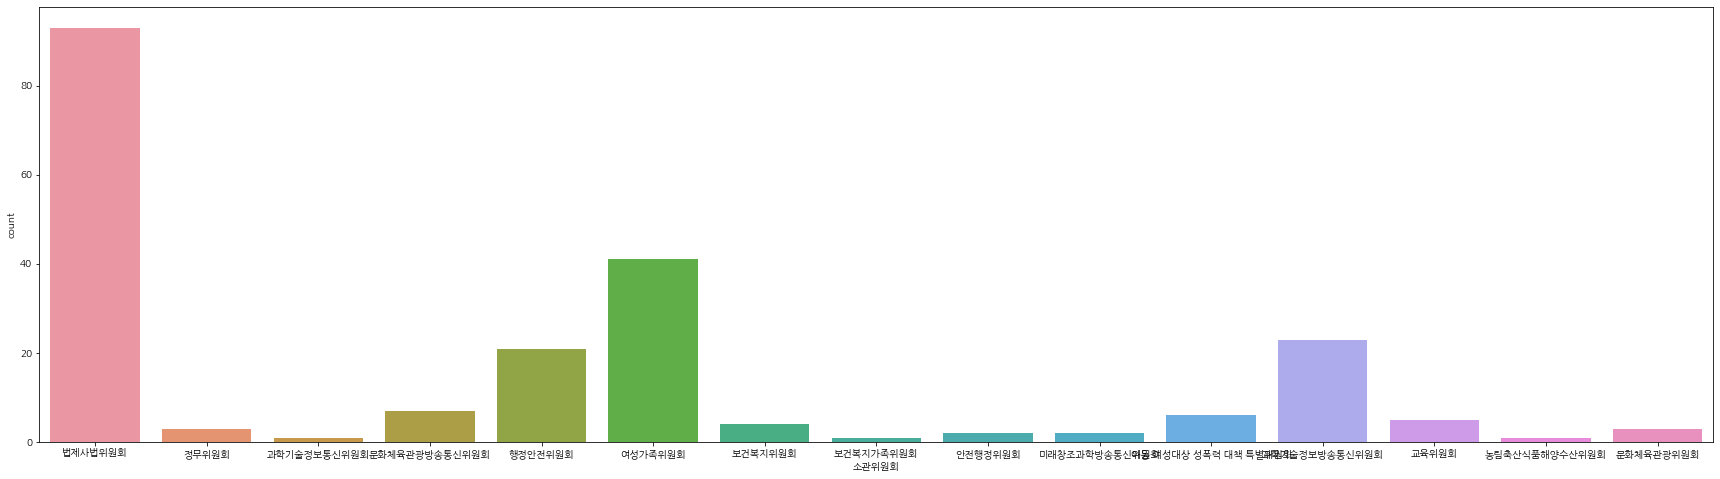

In [16]:
plt.figure(figsize = (30,8))
sns.set_palette("pastel")
sns.countplot(data=bill, x='소관위원회')

## 2. Wordcloud 분석을 통해 N번방 전후 의안 변화 분석

In [17]:
bill['제안일자'] = bill['제안일자'].dt.date

In [18]:
def preprocessing(text): 
    text_pre1 = re.sub('[-=.#/:$}·,■?]', ' ', text)
    text_pre2 = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text_pre1)
    return str(text_pre2)

# 의미없는 단어 삭제 
def remove_stopword(text): 
    stopwords = ['사이','을','이','의','를','에','가','들','은','는','으로','한','도','항','관','정',
              '수','에서','로','것','그','과','제','입니다','할','하고','적','하는','로부터','면','관','항','이',
              '합니다','와','에게','고','인','하여','등','저','있습니다','말','까지','일명','보장하',
              '그리고','다','만','했습니다','안','된','못','일','더','위','최근','인한','있어'
              '있는','해','또한','명','하지','정말','물','많은','것임','류','줄','통해',
              '중','게','너무','자','이런','때','되지','위해','에는','없는','중','물이',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','항','조','경우','함안','기간','하려는','일부',
              '마련','있도록','또는','함','하도록','개월','분','부터','제호','관','되고','년','월','및','등',\
              '안','바','이','것','부터','수','시','자',
            '조치','법률','일부개정법률안','현행법','이하','규정하','해당','사실','실시','조제','조의','발생','필요','포함','실정','상황',
            '이용','사람','사건','사항','운영','이상','선고','회국회','만원','삭제','상정','조정함','정기회','설치','규정','안제',
            '일방','법제사법위원회','정부안','임시회','촌이내','개정','구성','기타','의결','현행','본회','시행','조사','위원회','천만원',
            '의결제','조정','인정','국회','억원','부칙','본회의','제안','도지사','대통령령','감사','내용','제한','요청','통신','목적','발의',
            '기준','승인','우리','결과','법률안','협의','제출','불구','현재','범위']

    text = [word for word in text if word not in stopwords]
    return text

In [50]:
from konlpy.tag import Mecab, Okt, Hannanum

# okt = Okt()
hannanum = Hannanum()

def get_tokens(x):
    try:
        return [i for i in hannanum.nouns(x) if len(i) > 1] if x else []
    except Exception as e:
        if str(x) == 'nan':
            return []
        print(e)
        print(str(x))
        raise e

In [20]:
bill['의안텍스트'] = (bill['의안명'] + ' ' + bill['제안이유']).str.strip()
bill['의안텍스트'] = bill['의안텍스트'].apply(lambda x:str(x).lower())

In [21]:
%time bill['의안텍스트'] = bill['의안텍스트'].apply(preprocessing)

Wall time: 15 ms


In [23]:
%time bill['tokens'] = bill['의안텍스트'].apply(get_tokens)
bill['tokens'][:3]

Wall time: 5.45 s


0    [성폭력행위의처벌과피해자보호등에관한법률안, 우리, 사회, 개방화, 도시화, 추세, ...
1    [아동, 청소년의성보호에관한법률안, 동안, 우리사회, 일각, 제기, 아동, 청소년,...
2    [성폭력범죄의처벌및피해자보호등에관한법률중개정법률안, 자기, 사람, 성적, 욕망, 유...
Name: tokens, dtype: object

In [85]:
%time bill['tokens'] = bill['tokens'].apply(remove_stopword)

Wall time: 47.8 ms


In [41]:
n_bf = bill[bill['제안일자'] < datetime.date(2019,7,1)]
n_af = bill[bill['제안일자'] > datetime.date(2019,7,1)]

In [44]:
def total_tokens(df): 
    bill_tokens = []
    for row in df: 
        for word in row: 
            bill_tokens.append(word)
    return bill_tokens

def wordcloud_vis(tokens): 
    ko = nltk.Text(tokens, name=f'{tokens}')
    data = ko.vocab().most_common(150)
    data2 = dict(data)
    font_path = '콤퓨타세탁B.ttf'

    wordcloud = WordCloud(font_path=font_path,
                          width = 800, 
                         height = 800,
                         background_color='black',
                         colormap='autumn',
                         mask = naf_mask)

    wordcloud = wordcloud.generate_from_frequencies(data2)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [45]:
n_bf_word = total_tokens(n_bf['tokens'])

In [46]:
stopwords = ['조치','법률','일부개정법률안','현행법','이하','규정하','해당','사실','실시','조제','조의','발생','필요','포함','실정','상황',
            '이용','사람','사건','사항','운영','이상','선고','회국회','만원','삭제','상정','조정함','정기회','설치','규정','안제',
            '일방','법제사법위원회','정부안','임시회','촌이내','개정','구성','기타','규정함','본회','수립','항제', '의결제','촉진','의결',
            '영역','도모','확대','구현','이외','원안폐','조등', '행위', '신설']
n_bf_word = [each_word for each_word in n_bf_word if each_word not in stopwords]

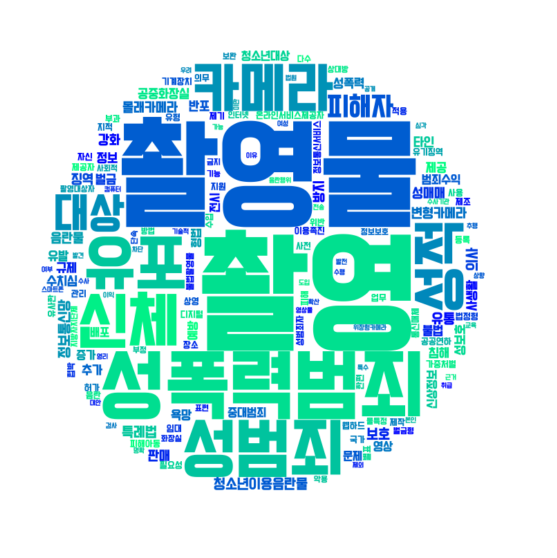

In [243]:
wordcloud_vis(n_bf_word)

In [47]:
n_af_word = total_tokens(n_af['tokens'])

In [48]:
n_af_word = [each_word for each_word in n_af_word if each_word not in stopwords]

In [55]:
n_word = total_tokens(bill['tokens'])

In [56]:
n_word = [each_word for each_word in n_word if each_word not in stopwords]

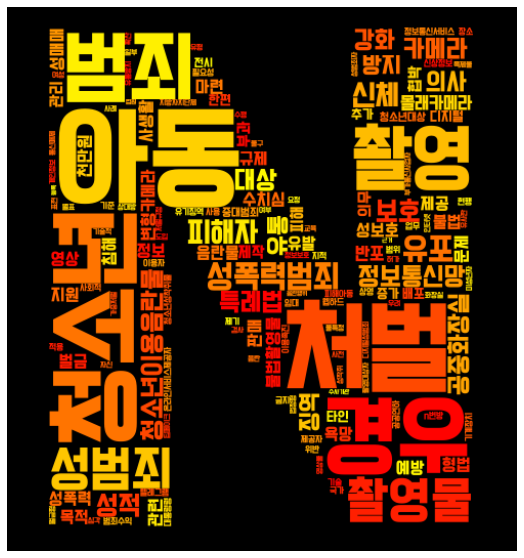

In [58]:
wordcloud_vis(n_word)

In [37]:
from PIL import Image
import numpy as np

In [39]:
naf_mask = np.array(Image.open('n번방.jpg'))

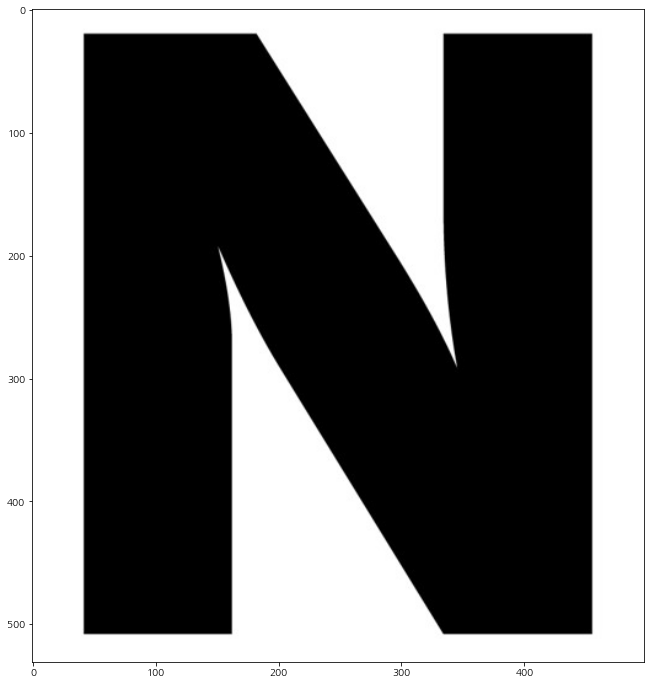

In [40]:
plt.figure(figsize = [12,12])
plt.imshow(naf_mask, interpolation='bilinear')
plt.show()

In [244]:
nbf_mask = np.array(Image.open('camera-100.jpg'))

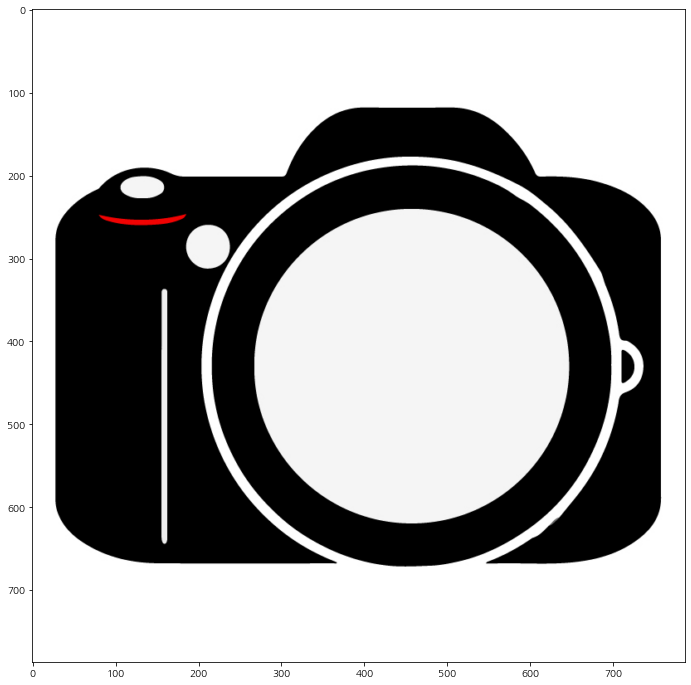

In [245]:
plt.figure(figsize = [12,12])
plt.imshow(nbf_mask, interpolation='bilinear')
plt.show()

## 3. Topic Modeling을 통해 의안의 숨겨진 주제 찾기

In [24]:
from gensim import corpora, models
import gensim

In [25]:
from konlpy.tag import *

In [26]:
terms = []

In [27]:
stop_word = '. '' , ·\n 흉 결 한편 는바 이제 규 민 차 지경 제 관 및 동안 일각 물 제 함 및 대한 승 를 위 달 호 여 뒤 항 간 후 권 권 개 산 은 숙 그 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 소리 놓'
stopword_list = stop_word.split(' ')
print(stopword_list)

['.', '', ',', '·\n', '흉', '결', '한편', '는바', '이제', '규', '민', '차', '지경', '제', '관', '및', '동안', '일각', '물', '제', '함', '및', '대한', '승', '를', '위', '달', '호', '여', '뒤', '항', '간', '후', '권', '권', '개', '산', '은', '숙', '그', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [28]:
for w in bill['제안이유']:
  okt = Okt()
  tokens = okt.nouns(w)
  stop_tokens = [i for i in tokens if not i in stopword_list]
  terms.append(stop_tokens)
    
print(terms)

[['개방', '도시화', '추세', '민생', '치안', '파탄', '여성', '미성년', '성폭력', '범죄', '날로', '포화', '집단', '지능', '단란', '가정', '파괴', '범죄자', '치부', '유괴', '인질', '범죄', '여성', '미성년', '납치', '인신매매', '전화', '컴퓨터', '이용', '여성', '성적', '해악', '언어', '영상', '송부하', '형태', '성폭력', '행위', '가정', '침투', '범죄', '유형', '또한', '다양', '가정', '여성', '평안', '자녀', '정서', '보호', '상황', '효율', '대처', '법안', '제안', '법안', '안함', '다음', '유의', '성폭력', '대처', '가중', '처벌', '법', '제정', '종합', '대책', '점임', '법안', '포화', '지능', '성폭력', '범죄', '가중', '처벌', '신종', '성폭력', '범죄', '처벌', '규정', '성폭력', '범죄', '수사', '재판', '절차', '피해자', '비밀', '보장', '형사소송', '상의', '특례', '피해자', '피해', '배상', '민사소송', '특례', '규정', '성폭력', '예방', '상담', '피해자', '보호', '시설', '행정', '사항', '규정', '이유', '여기', '법안', '형사처벌법', '형사소송', '법규', '특례', '행정', '법규', '포괄', '특별법', '특별법', '규제', '자유', '다양성', '민주', '법치국가', '형사법', '원칙', '훼손', '점임', '성폭력', '예방', '영화', '비디오', '신문', '기타', '출판물', '음란', '규제', '언론', '출판', '자유', '충돌', '법률', '직장', '지위', '이용', '간음', '추행', '죄', '성적', '모욕죄', '피해자', '진술서', '증거능력', '규정', '신중', '기', '노력', '이유', '여기', '개방사회', '다양성

In [29]:
dictionary = corpora.Dictionary(terms)

In [30]:
corpus = [dictionary.doc2bow(term) for term in terms]

In [31]:
dictionary = corpora.Dictionary(terms)
print(dictionary)

Dictionary(2342 unique tokens: ['가정', '가중', '간음', '강간죄', '강제추행']...)


In [32]:
corpus = [dictionary.doc2bow(term) for term in terms]
print(corpus)

[[(0, 3), (1, 4), (2, 3), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 2), (13, 7), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 2), (34, 2), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 3), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 11), (56, 2), (57, 3), (58, 2), (59, 1), (60, 5), (61, 1), (62, 2), (63, 1), (64, 2), (65, 2), (66, 3), (67, 3), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 3), (76, 1), (77, 2), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 2), (84, 4), (85, 21), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 3), (93, 2), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 5), (104, 1), (105, 1), (106, 3), (107, 1), (108, 2), (109, 1), (110, 

In [33]:
model = models.ldamodel.LdaModel(corpus, num_topics=9, id2word = dictionary)
model.show_topics(9, 10)

[(0,
  '0.036*"촬영" + 0.022*"공중화장실" + 0.020*"처벌" + 0.018*"이용" + 0.018*"범죄" + 0.012*"몰래카메라" + 0.012*"설치" + 0.011*"정보" + 0.010*"신체" + 0.010*"규정"'),
 (1,
  '0.029*"촬영" + 0.016*"범죄" + 0.014*"처벌" + 0.014*"이용" + 0.012*"불법" + 0.011*"행위" + 0.011*"성폭력" + 0.009*"정보통신망" + 0.009*"피해자" + 0.008*"제공"'),
 (2,
  '0.025*"범죄" + 0.024*"청소년" + 0.021*"촬영" + 0.014*"아동" + 0.012*"이용" + 0.011*"보호" + 0.010*"불법" + 0.010*"처벌" + 0.010*"피해자" + 0.010*"행위"'),
 (3,
  '0.047*"아동" + 0.036*"청소년" + 0.024*"이용" + 0.023*"음란물" + 0.018*"범죄" + 0.012*"이하" + 0.011*"처벌" + 0.010*"촬영" + 0.010*"카메라" + 0.010*"징역"'),
 (4,
  '0.028*"범죄" + 0.018*"불법" + 0.014*"촬영" + 0.012*"신설" + 0.010*"이용" + 0.010*"처벌" + 0.010*"유통" + 0.010*"행위" + 0.008*"성폭력" + 0.008*"수익"'),
 (5,
  '0.026*"범죄" + 0.018*"아동" + 0.017*"이용" + 0.016*"청소년" + 0.015*"카메라" + 0.014*"규정" + 0.013*"행위" + 0.013*"신설" + 0.012*"성범죄" + 0.012*"처벌"'),
 (6,
  '0.037*"청소년" + 0.036*"아동" + 0.018*"행위" + 0.018*"처벌" + 0.015*"촬영" + 0.013*"이용" + 0.011*"보호" + 0.010*"성범죄" + 0.010*"대상" + 0.009*"규정"'),
 (7,


In [34]:
NUM_TOPICS = 6

word_dict = {}
for i in range(NUM_TOPICS):
  words = model.show_topic(i, topn=10)
  word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
  word_df = pd.DataFrame(word_dict)

word_df

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06
0,촬영,촬영,범죄,아동,범죄,범죄
1,공중화장실,범죄,청소년,청소년,불법,아동
2,처벌,처벌,촬영,이용,촬영,이용
3,이용,이용,아동,음란물,신설,청소년
4,범죄,불법,이용,범죄,이용,카메라
5,몰래카메라,행위,보호,이하,처벌,규정
6,설치,성폭력,불법,처벌,유통,행위
7,정보,정보통신망,처벌,촬영,행위,신설
8,신체,피해자,피해자,카메라,성폭력,성범죄
9,규정,제공,행위,징역,수익,처벌


In [35]:
import pyLDAvis
import pyLDAvis.gensim

In [36]:
pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.031655 -0.028339       1        1  18.048563
3     -0.069545 -0.001055       2        1  16.737261
6     -0.042325 -0.000762       3        1  14.983763
5     -0.012247  0.025539       4        1  11.082597
0      0.039224 -0.060080       5        1  10.490761
4      0.031374  0.050922       6        1  10.358799
2      0.004238  0.011189       7        1   9.516722
1      0.037280  0.014310       8        1   5.775447
7      0.043657 -0.011724       9        1   3.006082, topic_info=      Term        Freq       Total Category  logprob  loglift
423     촬영  564.000000  564.000000  Default  30.0000  30.0000
817  공중화장실   78.000000   78.000000  Default  29.0000  29.0000
289     아동  536.000000  536.000000  Default  28.0000  28.0000
155    청소년  558.000000  558.000000  Default  27.0000  27.0000
85     성폭력  203.000000  203.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
286     신체    3.653970  159.047531   Topic9  -5.3349  -0.2689
664  정보통신망    3.227268   94.966995   Topic9  -5.4591   0.1226
438     것임    3.572478  175.793732   Topic9  -5.3575  -0.3915
179     피해    3.353989  125.644165   Topic9  -5.4206  -0.1188
655     유통    3.303250  119.134071   Topic9  -5.4358  -0.0808

[692 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1501      1  0.160770   가공
1501      3  0.482311   가공
1501      5  0.160770   가공
1626      1  0.589317  가입자
1626      2  0.196439  가입자
...     ...       ...  ...
795       4  0.307165   환수
795       6  0.383956   환수
795       7  0.153583   환수
1579      3  0.578924   회원
1579      4  0.192975   회원

[1849 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 7, 6, 1, 5, 3, 2, 8])

성능 안 좋음...
비슷한 단어 겹침